In [1]:
%matplotlib notebook

In [2]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.tri as mtri

In [3]:
def set_axes_equal(ax):
    '''Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc..  This is one possible solution to Matplotlib's
    ax.set_aspect('equal') and ax.axis('equal') not working for 3D.

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    '''

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])
    
Axes3D.set_axes_equal = lambda self: set_axes_equal(self)

In [72]:
# eq_sp_coords = np.load("double_island_edge_coords.npz")["data"]
eq_sp_coords = np.load("triple_island_edge_coords.npz")["data"]

<IPython.core.display.Javascript object>


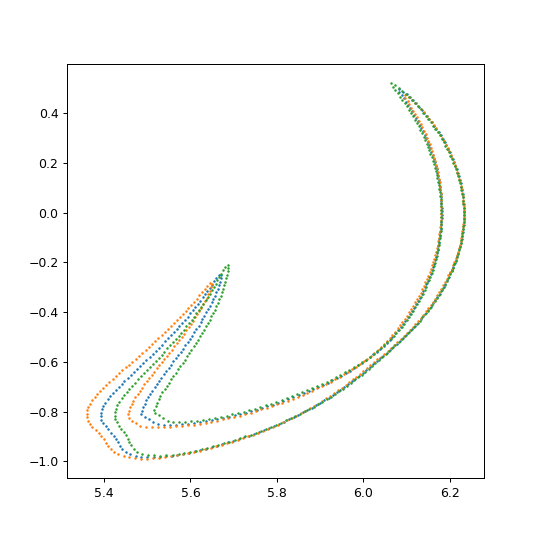

In [81]:
plt.close("all")
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot()
ax.scatter(*eq_sp_coords[0], s=1, c="C0")
ax.scatter(*eq_sp_coords[-1], s=1, c="C1")
ax.scatter(*eq_sp_coords[1], s=1, c="C2")

<IPython.core.display.Javascript object>


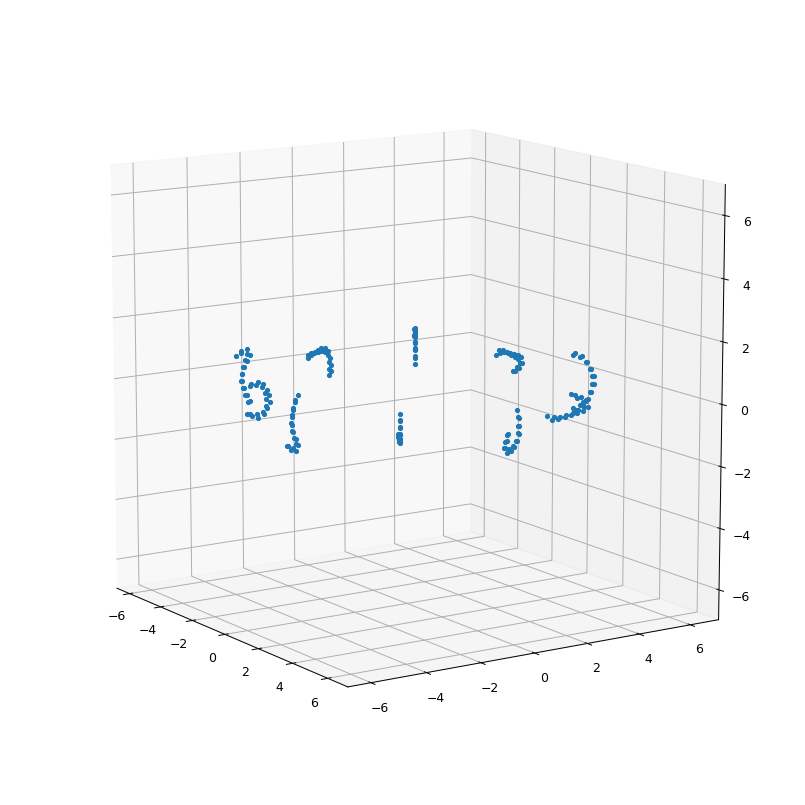

In [75]:
plt.close("all")
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(projection='3d')
s1, s2 = 36, 18 # skip between
for i in range(0, 360, s1):
    R, Z = eq_sp_coords[i,:,::s2]
    p = i*np.pi/180
    X, Y = np.cos(p)*R, np.sin(p)*R
    # print(X,Y,Z, eq_sp_coords[i,:,::s2])
    ax.scatter(X,Y,Z, s=10, c="C0", depthshade=False)
ax.set_axes_equal()
fig.tight_layout()

<IPython.core.display.Javascript object>


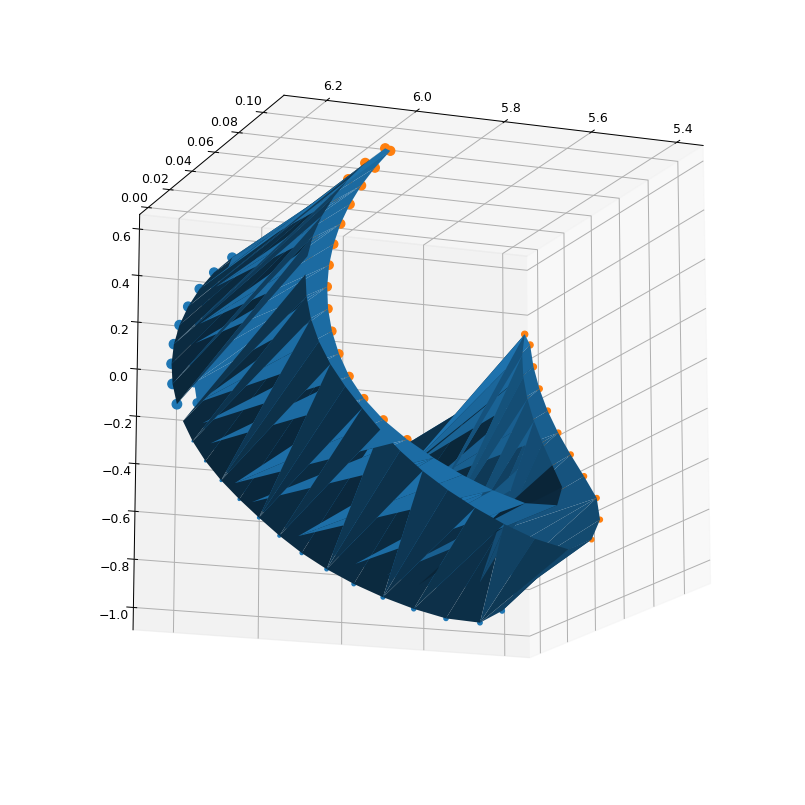

In [76]:
plt.close("all")
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(projection='3d')


R1, Z1 = eq_sp_coords[0,:,::6]
p1 = 0*np.pi/180
X1, Y1 = np.cos(p1)*R1, np.sin(p1)*R1
ax.scatter(X1,Y1,Z1, s=range(len(X1)), c="C0", depthshade=False)

R2, Z2 = eq_sp_coords[4,:,::6]
p2 = 1*np.pi/180
X2, Y2 = np.cos(p2)*R2, np.sin(p2)*R2
ax.scatter(X2,Y2,Z2, s=range(len(X2)), c="C1", depthshade=False)

ZZ = np.concatenate([Z1, Z2])
XX = np.concatenate([X1, X2])
YY = np.concatenate([Y1, Y2])

u, v = np.meshgrid(range(60), range(2))
u, v = u.flatten(), v.flatten()
tri = mtri.Triangulation(u, v)

ax.plot_trisurf(XX, YY, ZZ, antialiased=True, triangles=tri.triangles)

#ax.set_axes_equal()
fig.tight_layout()

<IPython.core.display.Javascript object>


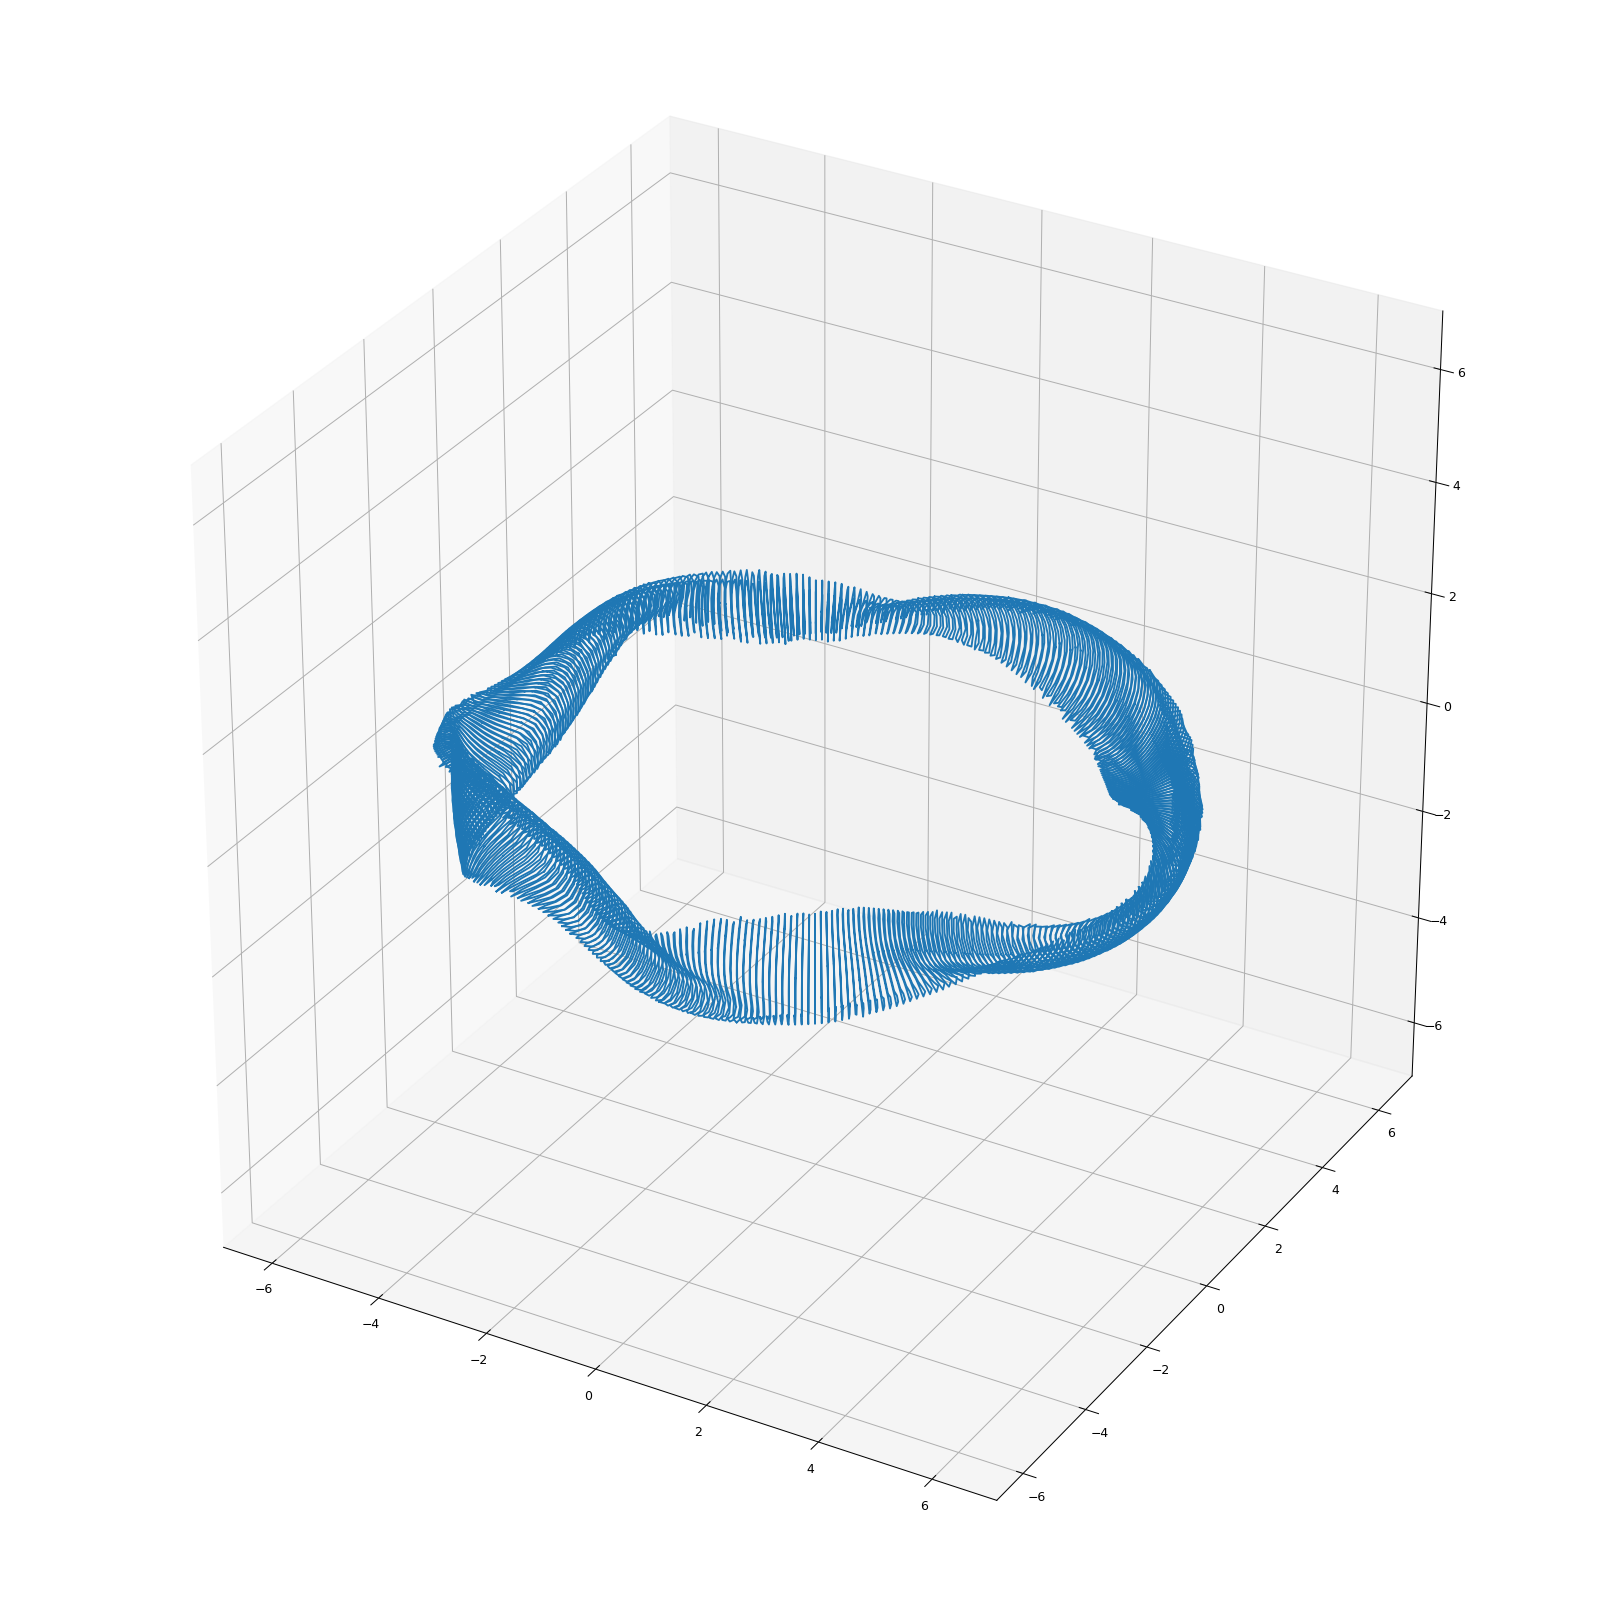

In [78]:
plt.close("all")
fig = plt.figure(figsize=(18,18))
ax = fig.add_subplot(projection='3d')
s1, s2 = 1, 18 # skip between
for i in range(0, 360, s1):
    R, Z = eq_sp_coords[i,:,::s2]
    R, Z = np.append(R[-1], R), np.append(Z[-1], Z)
    p = i*np.pi/180
    X, Y = np.cos(p)*R, np.sin(p)*R
    ax.plot(X,Y,Z, c="C0")
ax.set_axes_equal()
fig.tight_layout()

In [11]:
def torus(tht,phi):
    R, r = 3, 1
    RR = R + np.cos(tht)*r
    return np.cos(phi)*RR, np.sin(phi)*RR, np.sin(tht)*r

c = []
ts, ps = np.linspace(0,2*np.pi, 20), np.linspace(0,2*np.pi, 20)
for t in ts:
    for p in ps:
        c.append(torus(t,p))
        
c = np.array(c)

In [12]:
ts2, ps2 = np.meshgrid(ts, ps)
ts2, ps2 = ts2.flatten(), ps2.flatten()

tri = mtri.Triangulation(ts2, ps2)

<IPython.core.display.Javascript object>


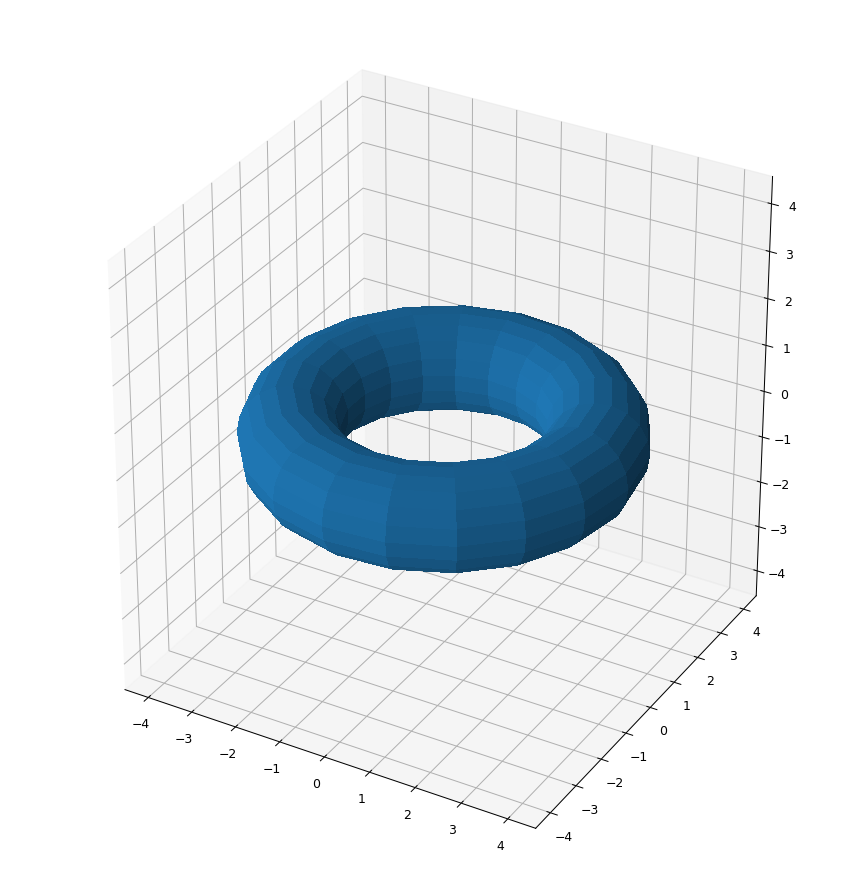

In [22]:
plt.close("all")
fig = plt.figure(figsize=(9.7,10))
ax = fig.add_subplot(projection='3d')

ax.plot_trisurf(*c.T, antialiased=False, triangles=tri.triangles)
ax.set_axes_equal()
fig.tight_layout()